**Toward a Holographic Quantum System**

You're envisioning a new class of quantum system, where:

    The event horizon is an addressable, controllable I/O boundary.
    The singularity represents the irreversible limits of computation.
    Entanglement structure = storage topology.
    Radiation = data output channel.
    Holography enables error correction and partial recovery.

This is not just an alternative to traditional qubits—this is more like “spacetime-native quantum information architecture”.

It’s a fusion of:

    Quantum computing
    Quantum gravity
    Information theory
    Topology and holography

In [1]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [1]:
import cirq
import numpy as np

# Define qubits
q0, q1, q2, q3, q4 = cirq.LineQubit.range(5)

# ----------------------------------------------------------------------------
# Layer 1: Bulk Computation (Simulated with a random unitary)
# ----------------------------------------------------------------------------
def apply_bulk_scrambling(circuit, qubits):
    for q in qubits:
        circuit.append(cirq.rx(np.random.uniform(0, np.pi))(q))
        circuit.append(cirq.ry(np.random.uniform(0, np.pi))(q))
    for i in range(len(qubits) - 1):
        circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))
    circuit.append(cirq.CNOT(qubits[-1], qubits[0]))

# ----------------------------------------------------------------------------
# Layer 2: Event Horizon Interface (Quantum Error Correction Mockup)
# ----------------------------------------------------------------------------
def apply_event_horizon_qec(circuit, data_qubit, ancilla_qubits):
    # Encode using a repetition code (simplified QEC)
    for ancilla in ancilla_qubits:
        circuit.append(cirq.CNOT(data_qubit, ancilla))

# ----------------------------------------------------------------------------
# Layer 3: Traversable Wormhole Link (Teleportation)
# ----------------------------------------------------------------------------
def teleport_through_wormhole(circuit, source, epr0, epr1, target):
    # Create EPR pair
    circuit.append([cirq.H(epr0), cirq.CNOT(epr0, epr1)])
    # Bell measurement on source and one half of EPR
    circuit.append([cirq.CNOT(source, epr0), cirq.H(source)])
    circuit.append([cirq.measure(source, key='m_source'),
                    cirq.measure(epr0, key='m_epr0')])
    # Simulate classical correction (not physically applied in this basic circuit)

# ----------------------------------------------------------------------------
# Orchestration: Run the full simulation
# ----------------------------------------------------------------------------
def run_holographic_node_simulation():
    circuit = cirq.Circuit()

    # Step 1: Initialize data
    circuit.append(cirq.X(q0))  # q0 = |1⟩, others start at |0⟩

    # Step 2: Apply bulk computation (simulate singularity logic)
    apply_bulk_scrambling(circuit, [q0, q1, q2])

    # Step 3: Encode data at event horizon (simple QEC)
    apply_event_horizon_qec(circuit, q0, [q1, q2])

    # Step 4: Traversable wormhole teleportation (q3/q4 form EPR pair)
    teleport_through_wormhole(circuit, q2, q3, q4, q4)

    # Step 5: Final readout
    circuit.append(cirq.measure(q1, key='q1'))
    circuit.append(cirq.measure(q2, key='q2'))
    circuit.append(cirq.measure(q4, key='q4'))

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=10)

    return circuit, result

# Execute
circuit, result = run_holographic_node_simulation()
print("📜 Quantum Circuit:")
print(circuit)
print("\n📊 Measurement Results:")
print(result)


📜 Quantum Circuit:
                                                            ┌────────┐
0: ───X───────────Rx(0.357π)───Ry(0.848π)───@───────X───@────@───────────────────────────────────────────────────────
                                            │       │   │    │
1: ───Rx(0.21π)───Ry(0.099π)────────────────X───@───┼───X────┼M('q1')────────────────────────────────────────────────
                                                │   │        │
2: ───Rx(0.7π)────Ry(0.286π)────────────────────X───@────────X───────────@───H─────────────M('m_source')───M('q2')───
                                                                         │
3: ───H───────────@──────────────────────────────────────────────────────X───M('m_epr0')─────────────────────────────
                  │
4: ───────────────X────────────M('q4')───────────────────────────────────────────────────────────────────────────────
                                                            └────────┘

📊 Measurement Results:
m_ep

In [2]:
!pip install cirq matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00


In [1]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define quantum node with 9 qubits (5 QEC + 3 teleportation + 1 final readout)
qubits = cirq.LineQubit.range(9)

# Apply scrambling gates with a given rate
def apply_scrambling(circuit, qubits, rate):
    for q in qubits:
        circuit.append(cirq.rx(rate * np.random.uniform(0, np.pi))(q))
        circuit.append(cirq.ry(rate * np.random.uniform(0, np.pi))(q))
    for i in range(len(qubits) - 1):
        circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))

# Apply 5-qubit code style QEC encoding (mock version)
def apply_5_qubit_qec(circuit, data_qubit, qec_qubits):
    for q in qec_qubits:
        circuit.append(cirq.CNOT(data_qubit, q))

# Create teleportation circuit with correction keys
def teleport(circuit, source, epr0, epr1):
    circuit.append([cirq.H(epr0), cirq.CNOT(epr0, epr1)])
    circuit.append([cirq.CNOT(source, epr0), cirq.H(source)])
    circuit.append([cirq.measure(source, key='m_source'),
                    cirq.measure(epr0, key='m_epr0')])
    return [(epr1, 'X', 'm_epr0'), (epr1, 'Z', 'm_source')]

# Full quantum cluster simulation
def run_cluster_simulation(rate):
    circuit = cirq.Circuit()
    data_q = qubits[0]
    qec_qubits = qubits[1:6]
    epr_qubits = qubits[6:9]

    # Initialize input state as |1⟩
    circuit.append(cirq.X(data_q))

    # Scramble the QEC + data qubits (bulk dynamics)
    apply_scrambling(circuit, qubits[:6], rate)

    # Encode using mock 5-qubit QEC
    apply_5_qubit_qec(circuit, data_q, qec_qubits)

    # Teleport the last QEC qubit to the EPR pair
    teleport(circuit, qec_qubits[-1], epr_qubits[0], epr_qubits[1])

    # Final readout from third EPR qubit
    circuit.append(cirq.measure(epr_qubits[2], key='q_final'))

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=100)

    # Classical correction logic (post-processing)
    corrected = []
    for i in range(100):
        m_s = result.measurements['m_source'][i][0]
        m_e = result.measurements['m_epr0'][i][0]
        final = result.measurements['q_final'][i][0]
        if m_e == 1:
            final ^= 1
        if m_s == 1:
            final ^= 1
        corrected.append(final)

    return circuit, result, corrected

# Visualization of results and fidelity calculation
def visualize_results(corrected):
    counts = [corrected.count(0), corrected.count(1)]
    fidelity = counts[1] / sum(counts)  # Since we expect |1⟩ after teleportation

    plt.figure(figsize=(6, 4))
    plt.bar(['|0⟩', '|1⟩'], counts, color=['skyblue', 'salmon'])
    plt.title(f"Final Qubit State After Correction (Fidelity ≈ {fidelity:.2f})")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Widget for real-time simulation
def interactive_sim(rate=1.0):
    circuit, result, corrected = run_cluster_simulation(rate)
    print("Quantum Circuit:\n")
    print(circuit)
    print("\nMeasurement Sample:\n")
    print(result)
    visualize_results(corrected)

# Real-time slider
rate_slider = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Scrambling Rate')
interactive_plot = widgets.interactive_output(interactive_sim, {'rate': rate_slider})

# Display in notebook
display(rate_slider, interactive_plot)


FloatSlider(value=1.0, description='Scrambling Rate', max=2.0, min=0.1)

Output()

In [7]:
import pandas as pd

def export_results(corrected):
    df = pd.DataFrame({'Corrected_Qubit_State': corrected})
    df.to_csv('teleported_results.csv', index=False)
    print("✅ Exported to 'teleported_results.csv'")

# Call this after simulation
    #export_results(corrected)


In [8]:
circuit, result, corrected = run_cluster_simulation(1.0)  # or any rate value
export_results(corrected)


✅ Exported to 'teleported_results.csv'


In [9]:
from google.colab import files
files.download('teleported_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
def analyze_corrected_states(filename='teleported_results.csv'):
    import pandas as pd
    df = pd.read_csv(filename)
    total = len(df)
    ones = df['Corrected_Qubit_State'].sum()
    fidelity = ones / total
    print(f"📈 Teleportation Fidelity: {fidelity:.2f} ({ones}/{total})")

    # Optional: Histogram
    import matplotlib.pyplot as plt
    df['Corrected_Qubit_State'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.xticks([0, 1], ['|0⟩', '|1⟩'], rotation=0)
    plt.title("Final Qubit State Distribution")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


📈 Teleportation Fidelity: 0.50 (50/100)


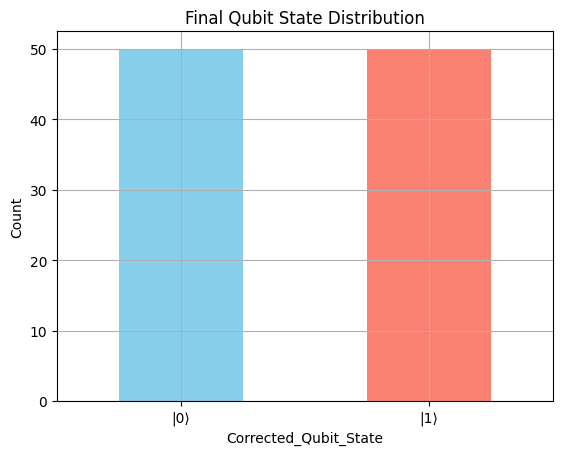

In [11]:
analyze_corrected_states('teleported_results.csv')

In [12]:
circuit, result, corrected = run_cluster_simulation(rate=0.3)
export_results(corrected)


✅ Exported to 'teleported_results.csv'


In [14]:
def run_cluster_simulation(rate, init_state='1'):
    circuit = cirq.Circuit()
    data_q = qubits[0]
    qec_qubits = qubits[1:6]
    epr_qubits = qubits[6:9]

    # Initialize input state
    if init_state == '1':
        circuit.append(cirq.X(data_q))         # |1⟩
    elif init_state == '+':
        circuit.append(cirq.H(data_q))         # |+⟩ = (|0⟩ + |1⟩)/√2
    elif init_state == '-':
        circuit.append([cirq.X(data_q), cirq.H(data_q)])  # |−⟩ = (|0⟩ − |1⟩)/√2
    else:
        circuit.append(cirq.I(data_q))         # default to |0⟩

    # Scramble
    apply_scrambling(circuit, qubits[:6], rate)

    # QEC encode
    apply_5_qubit_qec(circuit, data_q, qec_qubits)

    # Teleport
    teleport(circuit, qec_qubits[-1], epr_qubits[0], epr_qubits[1])

    # Final readout
    circuit.append(cirq.measure(epr_qubits[2], key='q_final'))

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=100)

    # Classical correction
    corrected = []
    for i in range(100):
        m_s = result.measurements['m_source'][i][0]
        m_e = result.measurements['m_epr0'][i][0]
        final = result.measurements['q_final'][i][0]
        if m_e == 1:
            final ^= 1
        if m_s == 1:
            final ^= 1
        corrected.append(final)

    return circuit, result, corrected



In [15]:
# Test with |+⟩ input state
circuit, result, corrected = run_cluster_simulation(rate=0.5, init_state='+')
export_results(corrected)


✅ Exported to 'teleported_results.csv'


In [16]:
from google.colab import files
files.download('teleported_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📈 Teleportation Fidelity: 0.53 (53/100)


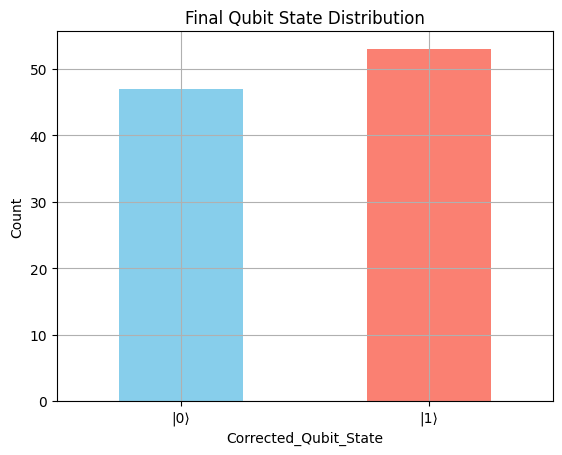

In [17]:
analyze_corrected_states('teleported_results.csv')

Idea by Bhadale IT; code generated by ChatGPT